In [39]:
 Regressi dengan menggunakan metoda least square 
# https://medium.com/@jrendz/regresi-linier-dengan-r-dan-python-ebb80662c6da
import numpy as np
import pandas as pd
import stat
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

tinggi_badan = [151,174,138,186,128,136,179,163,152,131]
berat_badan = [63, 81, 56, 91, 47, 57, 76, 72, 62, 48]
mean_bb = np.mean(berat_badan)
#print(mean_bb)
mean_tb = np.mean(tinggi_badan)
#print(mean_tb)
df_TB = pd.DataFrame(tinggi_badan, columns =['tinggi_badan'])
df_BB = pd.DataFrame(berat_badan, columns =['berat_badan'])
framesTB_BB = [df_TB, df_BB]
#menggabungkan data frame tinggi badan dan berat badan
gabungTB_BB = pd.concat(framesTB_BB, axis=1, join="inner")

In [3]:
# proses ini untuk mencari korelasi pearson 
# diambil dari https://medium.com/@jrendz/regresi-linier-dengan-r-dan-python-ebb80662c6da
gabungTB_BB['xi-meanTB'] = mean_tb - gabungTB_BB['tinggi_badan']
gabungTB_BB['xi-meanBB'] = mean_bb - gabungTB_BB['berat_badan']
gabungTB_BB['kuadrat_xi-meanTB'] = gabungTB_BB['xi-meanTB'] * gabungTB_BB['xi-meanTB'] 
gabungTB_BB['kuadrat_xi-meanBB'] = gabungTB_BB['xi-meanBB'] * gabungTB_BB['xi-meanBB'] 
gabungTB_BB['hasil_kali_xi_meanTB_BB']= gabungTB_BB['xi-meanTB']*gabungTB_BB['xi-meanBB']
sigma_xi_meanTB_BB = sum(gabungTB_BB['hasil_kali_xi_meanTB_BB'])
sigma_xi_meanTB_kuadrat = sum(gabungTB_BB['kuadrat_xi-meanTB'])
sigma_xi_meanBB_kuadrat = sum(gabungTB_BB['kuadrat_xi-meanBB'])
perkalian_A_B = sigma_xi_meanTB_kuadrat * sigma_xi_meanBB_kuadrat
akar_perkalian_A_B = np.sqrt(perkalian_A_B)
korelasi = sigma_xi_meanTB_BB / akar_perkalian_A_B 

print("rata-rata tinggi badan:", mean_tb)
print("rata-rata berat badan",mean_bb)

#print(gabungTB_BB)
print("sigma xi - mean TB-BB kuadrat", sigma_xi_meanTB_BB)
print("sigma xi - mean TB kuadrat", sigma_xi_meanTB_kuadrat)
print("sigma xi - mean BB kuadrat", sigma_xi_meanBB_kuadrat)
print("hasil perkalian antara x dan y",perkalian_A_B)
print("akar dari perkalian antara x dan y",akar_perkalian_A_B)
print("korelas pearsen", korelasi)

rata-rata tinggi badan: 153.8
rata-rata berat badan 65.3
sigma xi - mean TB-BB kuadrat 2649.6
sigma xi - mean TB kuadrat 3927.600000000001
sigma xi - mean BB kuadrat 1872.1
hasil perkalian antara x dan y 7352859.960000001
akar dari perkalian antara x dan y 2711.615747114624
korelas pearsen 0.9771295961897943


In [4]:
#mencari a(slope)
a = sigma_xi_meanTB_BB / sigma_xi_meanTB_kuadrat

#mencari intersept

b = mean_bb - a * mean_tb
print ("slope : ", a)
print ("intercept : ", b)

slope :  0.6746104491292391
intercept :  -38.45508707607698


In [5]:
x_train = gabungTB_BB['tinggi_badan'].values[:,np.newaxis]
y_train = gabungTB_BB['berat_badan'].values


In [6]:
lm = LinearRegression()
lm.fit(x_train,y_train) #fase training
print('Coefficient :' + str(lm.coef_))
print('Intercept :' + str(lm.intercept_))

Coefficient :[0.67461045]
Intercept :-38.45508707607698


In [22]:

x_test = [[170],[171]] #data yang akan diprediks
prediksi_1 = a * 165 + b
prediksi_2 = a * 120 + b
print (prediksi_1)
print(prediksi_2)

72.85563703024746
42.4981668194317


[76.22868928 76.90329973]


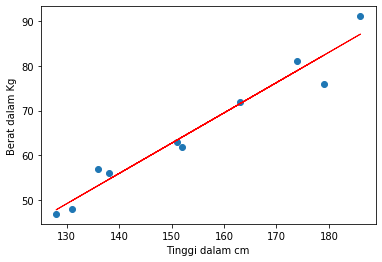

In [25]:
p = lm.predict(x_test) #fase prediksi
print(p) #hasil prediksi
#prepare plot
pb = lm.predict(x_train)
dfc = pd.DataFrame({'x': gabungTB_BB['tinggi_badan'],'y':pb})
plt.scatter(gabungTB_BB['tinggi_badan'],gabungTB_BB['berat_badan'])
plt.plot(dfc['x'],dfc['y'],color='red',linewidth=1)
plt.xlabel('Tinggi dalam cm')
plt.ylabel('Berat dalam Kg')
plt.show()

In [16]:
import numpy as np
import pandas as pd
import stat
from matplotlib import pyplot as plt
from sklearn import linear_model

tb = [151,174,138,186,128,136,179,163,152,131]
bb = [63, 81, 56, 91, 47, 57, 76, 72, 62, 48]

df_TB = pd.DataFrame(tb, columns =['tinggi_badan'])
df_BB = pd.DataFrame(bb, columns =['berat_badan'])
framesTB_BB = [df_TB, df_BB]

df = pd.concat(framesTB_BB, axis=1, join="inner")

In [17]:
print(df)

   tinggi_badan  berat_badan
0           151           63
1           174           81
2           138           56
3           186           91
4           128           47
5           136           57
6           179           76
7           163           72
8           152           62
9           131           48


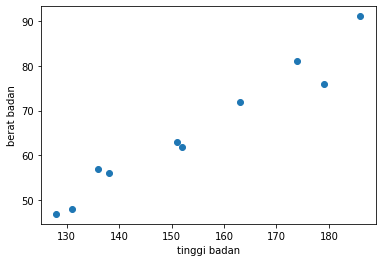

In [19]:
%matplotlib inline
plt.xlabel("tinggi badan")
plt.ylabel ("berat badan")
plt.scatter(df.tinggi_badan, df.berat_badan)

In [32]:
reg=linear_model.LinearRegression()
reg.fit(df[["tinggi_badan"]], df.berat_badan)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[76.22868928 76.90329973]


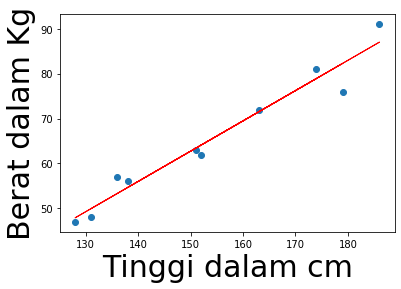

In [38]:
p = lm.predict(x_test) #fase prediksi
print(p) #hasil prediksi
#prepare plot
pb = lm.predict(x_train)
dfc = pd.DataFrame({'x': df['tinggi_badan'],'y':pb})
plt.scatter(df['tinggi_badan'],df['berat_badan'])
plt.plot(dfc['x'],dfc['y'],color='red',linewidth=1)
plt.xlabel('Tinggi dalam cm', fontsize=30)
plt.ylabel('Berat dalam Kg', fontsize=30)
plt.show()

In [40]:
# evaluasi dengan RMSE

In [49]:
N = len (df.tinggi_badan)
y_actual = df["berat_badan"]
y_pred = a * df["tinggi_badan"] + b
# untuk ngecek datanya muncul atau tidak bisa di pritn y_prediksinua
#print (y_pred)

In [51]:
# mengurangi y prediiksi dikurangi y actual 
y_pred_minus_y_actual  = y_pred - y_actual

In [53]:
# membuat kuadrat dari hasil y_pred -  y actual
y_pred_minus_y_actual_square = y_pred_minus_y_actual * y_pred_minus_y_actual

In [56]:
RMSE = np.sqrt(np.sum(y_pred_minus_y_actual_square )/N)

In [57]:
print (RMSE)

2.9095043218247274


In [61]:
# semakin kecil nilai RMSE adalah semakin akurat model prediksi yang kita buat, 
# jika nilai RMSE 0, maka keakuratannya 100 %

   ukuran  harga
0    17.5     30
1    24.7     36
2    15.7     25
3    18.0     29
4    27.0     32


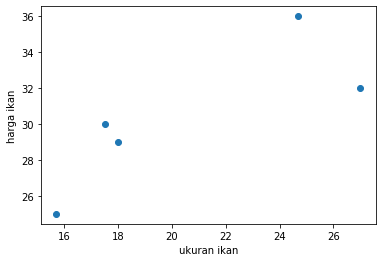

In [62]:
# data baru

from matplotlib import pyplot as plt

data = {"ukuran": [17.5,24.7, 15.7, 18,27 ],
       "harga" :[30,36, 25, 29, 32]}

df = pd.DataFrame(data)

print (df)

plt.scatter (df['ukuran'], df['harga'])
plt.xlabel ("ukuran ikan")
plt.ylabel ("harga ikan")
plt.show()
x_mean = np.mean(df['ukuran'])
y_mean= np.mean(df['harga'])

In [64]:
nominator = np.sum((df['ukuran']-x_mean) * (df['harga']-y_mean))
denominator = np.sum(pow(df['ukuran']-x_mean,2))
print (nominator)
print (denominator)

64.53999999999999
98.148


In [65]:
# mencari slope
slope = nominator / denominator 
print (slope)

0.657578351061662


In [66]:
#mencari intercep
intercep = y_mean - (slope * x_mean)
print (intercep)

16.867037535150992


In [67]:
# model prediksi setelah ditemukan slope dan intercep
y_pred = intercep + slope * df['ukuran']

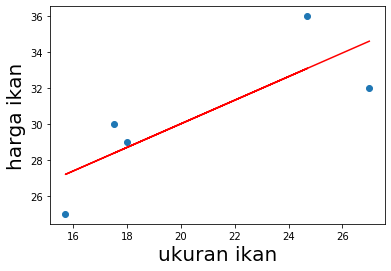

In [68]:
plt.scatter (df['ukuran'], df['harga'])
plt.plot(df['ukuran'], y_pred, color="red")
plt.xlabel ("ukuran ikan", fontsize=20)
plt.ylabel ("harga ikan",fontsize = 20 )
plt.show()